In [1]:
import pandas as pd
import numpy as np
import time

In [2]:
# data_ = pd.read_excel("hasil_prediksi\svm\seleksi/seleksi_all_fuzzy.xlsx") #seleksi_all_fuzzy_18_ribu.xlsx
data_ = pd.read_excel("hasil_prediksi\svm\seleksi/seleksi_all_fuzzy_18_ribu.xlsx")
komentar = data_['komentar'].tolist()
label = data_['label'].tolist()
data_.head()

,Column1,label,komentar
0,0,non spam,zzeza17 baca dari atas komen km ga salah macam...
1,1,non spam,zy zy1321 aku syukur ko
2,2,spam,zuma99 com agen bandar domino bandar poket onl...
3,3,non spam,zulrobertsihombing anak bapak kayak sun
4,4,non spam,zulfikar165 makasih atas kritik masuk nya aku ...


non spam    15089
spam         3499
Name: label, dtype: int64


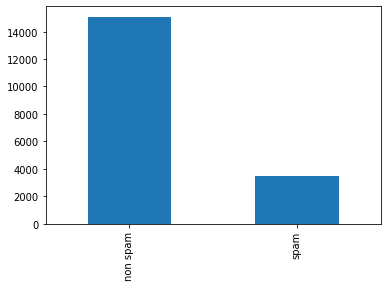

In [5]:
print(pd.value_counts(data_['label']))
pd.value_counts(data_['label']).plot.bar(title='')

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(komentar)
print(tfidf_matrix.shape)
Y = np.array(label)
y = Y
X = tfidf_matrix

(18588, 24146)


In [14]:
from sklearn.naive_bayes import ComplementNB

In [17]:
K = 100 #pembagian data uji dan data latih

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score #, precision_score, recall_score
kf= KFold(n_splits=K) 
skf = StratifiedKFold(n_splits=K,random_state=2, shuffle=True)
skf

# alpha_range = np.arange(0.1,2.01,0.01)
# alpha_range = np.arange(2.0,4.01,0.01)
alpha_range = np.arange(6,11.05,0.05)

rerata_akurasi_cnb = []
rerata_waktu_eksekusi = []
rerata_waktu_prediksi = []

count=0
for i in range(len(alpha_range)): #melakukan interasi sebanyak data parameter C
    print(alpha_range[i], end='')
    alpha = alpha_range[i]
    akurasi_cnb = []
    comNB = ComplementNB(alpha = alpha) #model
    waktu_eksekusi = []
    waktu_prediksi = []
    tic = time.perf_counter()
#     for train_index, test_index in kf.split(X): 
    for train_index, test_index in skf.split(X, Y):
            #membagi data latih dan data uji
        X_train, X_test = X[train_index], X[test_index] #pembagian data latih
        y_train, y_test = y[train_index], y[test_index]
    
        #Melatih Model 
        mCNB = comNB.fit(X_train, y_train) 
            
        #proses prediksi
        P_CNB = mCNB.predict(X_test)
        
        start = time.time()
        #Melatih Model
        mCNB = comNB.fit(X_train, y_train)  #SVM
        end = time.time()
        waktu_eksekusi.append(end-start)
            
        #proses prediksi
        start = time.time()
        P_CNB = mCNB.predict(X_test)
        end = time.time()
        waktu_prediksi.append(end-start)
        
    
        akurasi_cnb.append(accuracy_score(y_test, P_CNB))
        print(".", end="")
    toc = time.perf_counter()
#     print("iterasi ke-", count)
        
    rr = sum(akurasi_cnb)/len(akurasi_cnb)
    rerata_akurasi_cnb.append(rr)
    
    rerata_waktu_eksekusi.append(sum(waktu_eksekusi)/len(waktu_eksekusi))
    rerata_waktu_prediksi.append(sum(waktu_prediksi)/len(waktu_prediksi))
    count+=1
    print(rr)
#     print("")
    
#proses mencari parameter dan akurasi terbaik
x = max(rerata_akurasi_cnb)
index = rerata_akurasi_cnb.index(x)
print("---------------------------")
print("alpha terbaik adalah :", round(alpha_range[index],2))
print("             Akurasi :", round(x, 2))

round_akurasi_cnb = []
for i in rerata_akurasi_cnb:
    round_akurasi_cnb.append(round(i,2))
dict_komentar  = {"alpha":alpha_range,"akurasi":rerata_akurasi_cnb, "Akurasi round":round_akurasi_cnb, "waktu eksekusi":rerata_waktu_eksekusi, "waktu prediksi":rerata_waktu_prediksi}
df = pd.DataFrame(dict_komentar,columns = ["alpha","akurasi","Akurasi round", "waktu eksekusi", "waktu prediksi"])
writer = pd.ExcelWriter('data/parameter-akurasi-cnb_fix.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='cnb-parameter-cnb')

#menyimpan file
writer.save()

6.0....................................................................................................0.9360324949774462
6.05....................................................................................................0.9360862584183066
6.1....................................................................................................0.9361400218591668
6.1499999999999995....................................................................................................0.9360859678051127
6.199999999999999....................................................................................................0.9361934946868331
6.249999999999999....................................................................................................0.9360862584183063
6.299999999999999....................................................................................................0.9359249680957258
6.349999999999999.......................................................................

8.99999999999999....................................................................................................0.9367302572558533
9.04999999999999....................................................................................................0.9366764938149931
9.099999999999989....................................................................................................0.9366764938149931
9.149999999999988....................................................................................................0.9365152034924126
9.199999999999989....................................................................................................0.9365689669332727
9.24999999999999....................................................................................................0.9365152034924124
9.299999999999988....................................................................................................0.9365152034924124
9.349999999999987..................................

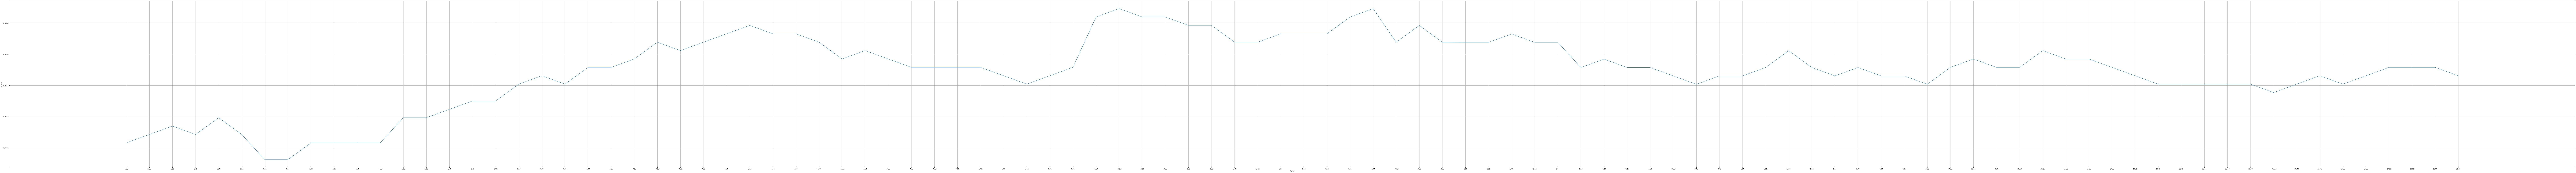

In [18]:
import matplotlib.pyplot as plt
x= df['akurasi'].tolist()
y= df['alpha'].tolist()

plt.figure(figsize=(300,20))
plt.grid(100)
plt.plot(y, x,)
plt.xticks(y)
# plt.xlabel('Akurasi')
plt.ylabel('Akurasi')
plt.xlabel('Aplha')
# for i in range(len(x)):
#     plt.axvline(x[i],0,y[i]) 
plt.show()